In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

In [22]:
df = pd.read_csv("../data/processed_data/vancouver_real_estate.csv", index_col = 0)


In [23]:
df.head()

address  bedroom  bathroom  square_footage      price  \
0    1001 Homer St #1901      1.0       1.0           505.0   658000.0   
1  1003 Burnaby St #1106      1.0       1.0           411.0   485000.0   
2    1005 W 7th Ave #303      1.0       1.0           981.0   899000.0   
3   1008 Cambie St #2906      1.0       NaN           802.0   998000.0   
4   1009 Expo Blvd #1903      3.0       2.0          1146.0  1388000.0   

  postalCode   latitude  longitude  \
0    V6B 1M9        NaN        NaN   
1    V6E 4R7        NaN        NaN   
2    V6H 1B2        NaN        NaN   
3    V6B 6J7  49.275743   -123.118   
4    V6Z 2V9        NaN        NaN   

                                       property_link discrepancies  
0  https://www.redfin.com/bc/vancouver/1001-Homer...           NaN  
1  https://www.redfin.com/bc/vancouver/1003-Burna...           NaN  
2  https://www.redfin.com/bc/vancouver/1005-W-7th...           NaN  
3  https://www.redfin.ca/bc/vancouver/1008-Cambie...           NaN  
4  https://www.redfin.com/bc/vancouver/1009-Expo-...           NaN

In [24]:
print(df.shape)

(6036, 10)


In [25]:
df.describe()

bedroom     bathroom  square_footage         price     latitude  \
count  5874.000000  5463.000000     5879.000000  5.965000e+03  5744.000000   
mean      2.879299     2.398865     1678.472529  2.190456e+06    49.255481   
std       1.910184     1.489151     1479.520866  2.619976e+06     0.024536   
min       0.000000     0.500000      101.000000  5.400000e+04    49.181936   
25%       2.000000     1.000000      790.000000  8.480000e+05    49.236362   
50%       2.000000     2.000000     1203.000000  1.498000e+06    49.261249   
75%       4.000000     3.000000     2050.000000  2.498000e+06    49.276484   
max      14.000000    12.000000    26002.000000  4.980000e+07    49.313628   

         longitude  
count  5744.000000  
mean   -123.111329  
std       0.040900  
min    -123.224001  
25%    -123.131293  
50%    -123.117438  
75%    -123.088330  
max    -122.992793

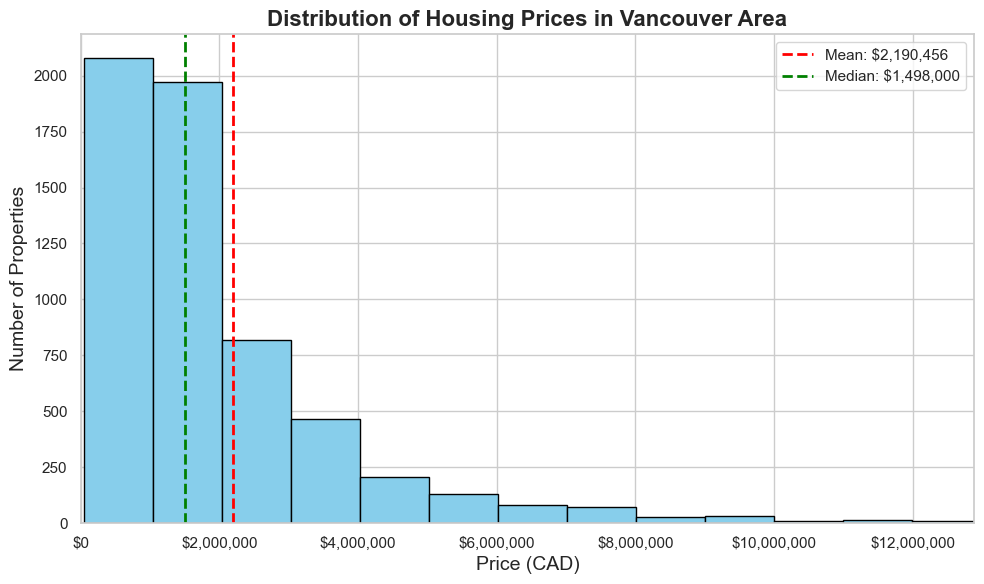

In [26]:
# Set seaborn style for cleaner visuals
sns.set(style="whitegrid")

# Drop NA and define price data
price_data = df["price"].dropna()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(price_data, bins=50, color='skyblue', edgecolor='black')

# Titles and labels
plt.title("Distribution of Housing Prices in Vancouver Area", fontsize=16, fontweight='bold')
plt.xlabel("Price (CAD)", fontsize=14)
plt.ylabel("Number of Properties", fontsize=14)

# Format x-axis with thousands separator
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${int(x):,}'))

# Add vertical lines for key statistics
mean_price = price_data.mean()
median_price = price_data.median()

plt.axvline(mean_price, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_price:,.0f}')
plt.axvline(median_price, color='green', linestyle='--', linewidth=2, label=f'Median: ${median_price:,.0f}')

# Show legend
plt.legend()

# Optional: Adjust x-limits if there's a long tail
plt.xlim(0, price_data.quantile(0.99))  # Focus on the bulk of distribution

plt.tight_layout()
plt.show()


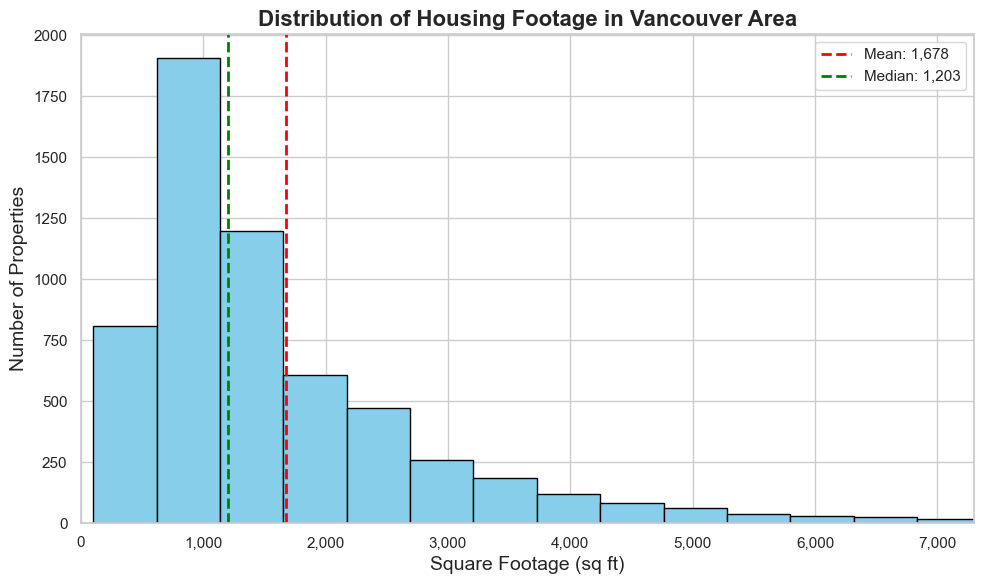

In [27]:
# Set seaborn style for cleaner visuals
sns.set(style="whitegrid")

# Drop NA and define price data
footage_data = df["square_footage"].dropna()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(footage_data, bins=50, color='skyblue', edgecolor='black')

# Titles and labels
plt.title("Distribution of Housing Footage in Vancouver Area", fontsize=16, fontweight='bold')
plt.xlabel("Square Footage (sq ft)", fontsize=14)
plt.ylabel("Number of Properties", fontsize=14)

# Format x-axis with thousands separator
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

# Add vertical lines for key statistics
mean_footage = footage_data.mean()
median_footage = footage_data.median()

plt.axvline(mean_footage, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_footage:,.0f}')
plt.axvline(median_footage, color='green', linestyle='--', linewidth=2, label=f'Median: {median_footage:,.0f}')

# Show legend
plt.legend()

# Optional: Adjust x-limits if there's a long tail
plt.xlim(0, footage_data.quantile(0.99))  # Focus on the bulk of distribution

plt.tight_layout()
plt.show()


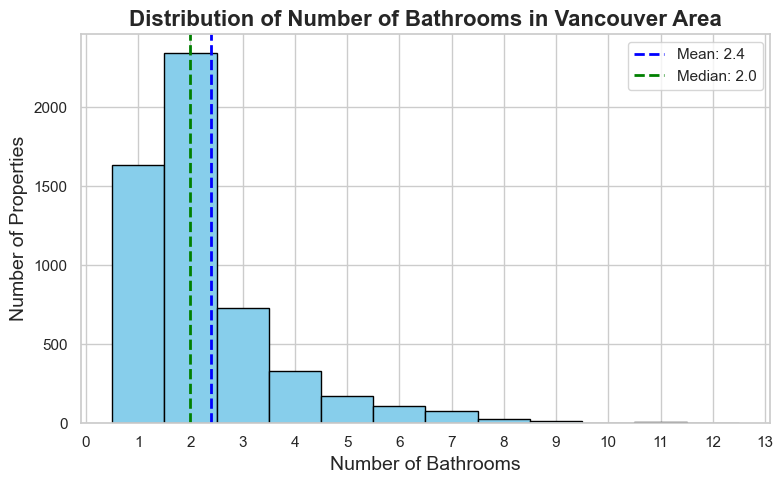

In [28]:
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")

# Plot histogram for number of bathrooms
bath_data = df["bathroom"].dropna()
plt.hist(bath_data, bins=range(1, int(bath_data.max()) + 2), color='skyblue', edgecolor='black', align='left')

# Titles and labels
plt.title("Distribution of Number of Bathrooms in Vancouver Area", fontsize=16, fontweight='bold')
plt.xlabel("Number of Bathrooms", fontsize=14)
plt.ylabel("Number of Properties", fontsize=14)

# Add vertical lines for mean and median
mean_bath = bath_data.mean()
median_bath = bath_data.median()
plt.axvline(mean_bath, color='blue', linestyle='--', linewidth=2, label=f'Mean: {mean_bath:.1f}')
plt.axvline(median_bath, color='green', linestyle='--', linewidth=2, label=f'Median: {median_bath:.1f}')

plt.xticks(range(0, int(bath_data.max()) + 2))
plt.legend()
plt.tight_layout()
plt.show()


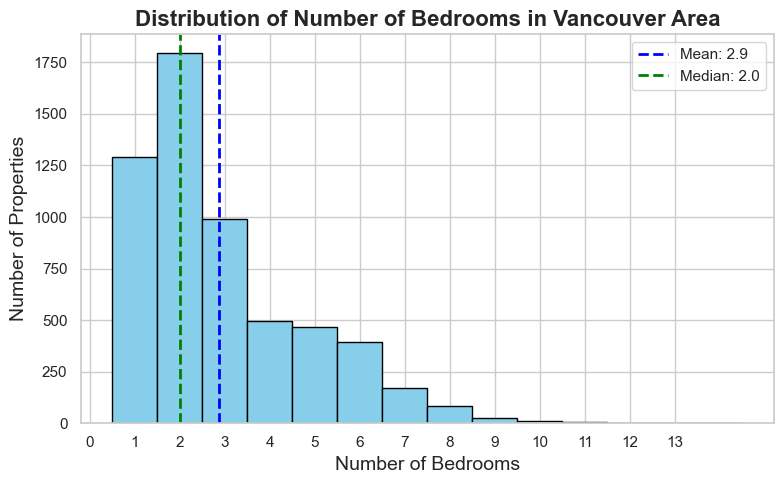

In [29]:
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")

# Plot histogram for number of bathrooms
bed_data = df["bedroom"].dropna()
plt.hist(bed_data, bins=range(1, int(bed_data.max()) + 2), color='skyblue', edgecolor='black', align='left')

# Titles and labels
plt.title("Distribution of Number of Bedrooms in Vancouver Area", fontsize=16, fontweight='bold')
plt.xlabel("Number of Bedrooms", fontsize=14)
plt.ylabel("Number of Properties", fontsize=14)

# Add vertical lines for mean and median
mean_bed = bed_data.mean()
median_bed = bed_data.median()
plt.axvline(mean_bed, color='blue', linestyle='--', linewidth=2, label=f'Mean: {mean_bed:.1f}')
plt.axvline(median_bed, color='green', linestyle='--', linewidth=2, label=f'Median: {median_bed:.1f}')

plt.xticks(range(0, int(bath_data.max()) + 2))
plt.legend()
plt.tight_layout()
plt.show()


In [30]:
# # Further examination of price distribution by zip code

# zip_summary = df.groupby("zip_code").agg(
#     num_properties=("price", "count"),
#     mean_price=("price", "mean"),
#     median_price=("price", "median"),
#     mean_sqft=("square_footage", "mean"),
#     median_sqft=("square_footage", "median")
# ).reset_index()

# # Optionally: format large numbers for readability
# zip_summary["mean_price"] = zip_summary["mean_price"].round(0)
# zip_summary["median_price"] = zip_summary["median_price"].round(0)
# zip_summary["mean_sqft"] = zip_summary["mean_sqft"].round(0)
# zip_summary["median_sqft"] = zip_summary["median_sqft"].round(0)

# # Display the summary
# zip_summary


In [ ]:
df_geo = df.dropna(subset=['latitude', 'longitude']) 

vancouver_locator = [49.2827, -123.1207]
real_estate_map = folium.Map(location=[vancouver_locator[0], vancouver_locator[1]], zoom_start=5)  # Adjust zoom as needed


marker_cluster = MarkerCluster().add_to(real_estate_map)
 
for index, row in df_geo.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Lat: {row['latitude']}, Lon: {row['longitude']}"
    ).add_to(marker_cluster)  # Add markers to the cluster

real_estate_map

In [34]:
df_graph

address  bedroom  bathroom  square_footage      price  \
8     1003 Burnaby St #1307      1.0       1.0           615.0   680000.0   
9     1003 Burnaby St #1307      1.0       1.0           615.0   680000.0   
19     1008 Cambie St #1902      1.0       1.0           603.0   625000.0   
66           1017 Mclean Dr      0.0       1.0          1700.0  1449900.0   
78    1028 Barclay St #2405      2.0       2.0          1027.0  1280000.0   
...                     ...      ...       ...             ...        ...   
5174         980 W 58th Ave      4.0       3.5          2121.0  2065000.0   
5179    985 W 10th Ave #301      1.0       1.0           695.0   649900.0   
5182         985 W 33rd Ave      6.0       3.0          3500.0  3820000.0   
5215        E 12th Ave #401      1.0       1.0           589.0   589000.0   
5216     PH5-485 W 63rd Ave      3.0       2.0          1033.0  1698000.0   

     postalCode   latitude   longitude  \
8       V6E 4R7  49.278745 -123.130403   
9       V6E 4R7  49.278745 -123.130403   
19      V6B 6J7  49.275743 -123.118000   
66      V5L 3N2  49.275508 -123.074679   
78      V6E 0B1  49.282031 -123.125905   
...         ...        ...         ...   
5174    V6P 6Y3  49.218016 -123.127872   
5179    V5Z 1L9  49.262694 -123.126165   
5182    V5Z 2K6  49.241652 -123.126936   
5215    V5T 0C7  49.259996 -123.095985   
5216    V5X 2J3  49.213440 -123.115976   

                                          property_link discrepancies  
8     https://www.redfin.com/bc/vancouver/1003-Burna...         price  
9     https://www.redfin.com/bc/vancouver/1003-Burna...         price  
19    https://www.redfin.com/bc/vancouver/1008-Cambi...         price  
66    https://www.redfin.com/bc/vancouver/1017-McLea...       bedroom  
78    https://www.redfin.com/bc/vancouver/1028-Barcl...         price  
...                                                 ...           ...  
5174  https://www.redfin.com/bc/vancouver/980-W-58th...         price  
5179  https://www.redfin.com/bc/vancouver/985-W-10th...         price  
5182  https://www.redfin.com/bc/vancouver/985-W-33rd...         price  
5215  https://www.redfin.com/bc/vancouver/401-E-12th...         price  
5216  https://www.redfin.com/bc/vancouver/485-W-63rd...         price  

[276 rows x 10 columns]

In [39]:
import folium
from folium.plugins import MarkerCluster  

df_graph = df_geo.dropna()


center_lat = df_graph['latitude'].mean()
center_lon = df_graph['longitude'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=10)

marker_cluster = MarkerCluster().add_to(m) 
for index, row in df_graph.iterrows():
    html = f"""
        <b>Address:</b> {row['address']}<br>
        <b>Price:</b> ${row['price']}<br>  
        <b>Bedrooms:</b> {row['bedroom']}<br>
        <b>Bathrooms:</b> {row['bathroom']}<br>
        <b>Sq. Footage:</b> {row['square_footage']}
    """  
    iframe = folium.IFrame(html=html, width=200, height=150) 
    popup = folium.Popup(iframe, max_width=2650) 


    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=popup
    ).add_to(marker_cluster)


m.save("../data/visualization/map_visualization.html")
m

In [41]:
df

address  bedroom  bathroom  square_footage      price  \
0       1001 Homer St #1901      1.0       1.0           505.0   658000.0   
1     1003 Burnaby St #1106      1.0       1.0           411.0   485000.0   
2       1005 W 7th Ave #303      1.0       1.0           981.0   899000.0   
3      1008 Cambie St #2906      1.0       NaN           802.0   998000.0   
4      1009 Expo Blvd #1903      3.0       2.0          1146.0  1388000.0   
...                     ...      ...       ...             ...        ...   
5212   999 Seymour St #1201      0.0       1.0           473.0   485000.0   
5213   999 Seymour St #1701      0.0       1.0           473.0   499000.0   
5214   999 Seymour St #2502      2.0       2.5          1207.0  1650000.0   
5215        E 12th Ave #401      1.0       1.0           589.0   589000.0   
5216     PH5-485 W 63rd Ave      3.0       2.0          1033.0  1698000.0   

     postalCode   latitude   longitude  \
0       V6B 1M9        NaN         NaN   
1       V6E 4R7        NaN         NaN   
2       V6H 1B2        NaN         NaN   
3       V6B 6J7  49.275743 -123.118000   
4       V6Z 2V9        NaN         NaN   
...         ...        ...         ...   
5212    V6B 0M5  49.278884 -123.122072   
5213    V6B 0M5  49.278884 -123.122072   
5214    V6B 0M5  49.278884 -123.122072   
5215    V5T 0C7  49.259996 -123.095985   
5216    V5X 2J3  49.213440 -123.115976   

                                          property_link discrepancies  
0     https://www.redfin.com/bc/vancouver/1001-Homer...           NaN  
1     https://www.redfin.com/bc/vancouver/1003-Burna...           NaN  
2     https://www.redfin.com/bc/vancouver/1005-W-7th...           NaN  
3     https://www.redfin.ca/bc/vancouver/1008-Cambie...           NaN  
4     https://www.redfin.com/bc/vancouver/1009-Expo-...           NaN  
...                                                 ...           ...  
5212  https://www.redfin.com/bc/vancouver/999-Seymou...           NaN  
5213  https://www.redfin.com/bc/vancouver/999-Seymou...           NaN  
5214  https://www.redfin.com/bc/vancouver/999-Seymou...           NaN  
5215  https://www.redfin.com/bc/vancouver/401-E-12th...         price  
5216  https://www.redfin.com/bc/vancouver/485-W-63rd...         price  

[6036 rows x 10 columns]